<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/ML_Models_V_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LinearRegression


In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
df_encoded = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
df_encoded.rename(columns = {'เพศ_หญิง':'เพศหญิง','เพศ_ชาย' : 'เพศชาย', 'seasons_summer' : 'summer', 'seasons_winter' : 'winter', 'พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้' : 'ใต้ร่มไม้', 'พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง' : 'กลางแจ้ง',
                       'พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม' : 'มีหลังคาคลุม', 'พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร' : 'ภายใต้อาคาร', 'อุณหภูมิ' : 'ความรู้สึกถึงอุณหภูมิ', 'ความชื้น' : 'ความรู้สึกถึงความชื้น',
                       'กระแสลม' : 'ความรู้สึกถึงกระแสลม','ความแรงของแสงแดด' : 'ความรู้สึกถึงแสงแดด','เหงื่อบริเวณผิวหนัง' : 'ความรู้สึกถึงเหงื่อ', 'ความร้อน' : 'ความต้องการอุณหภูมิ','ความชื้น.1' : 'ความต้องการความชื้น', 'กระแสลม.1': 'ความต้องการกระแสลม', 'แสงแดด' : 'ความต้องการแสงแดด',
                       'เหงื่อบริเวณผิวหนัง.1': 'ความต้องการเหงื่อ'}, inplace = True)
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    object 
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    int64  
 8   ความรู้สึกถึงความชื้น   193 non-null    int64  
 9   ความรู้สึกถึงกระแสลม    193 non-null    int64  
 10  ความรู้สึกถึงแสงแดด     193 non-null    int64  
 11  ความรู้สึกถึงเหงื่อ     193 non-null    int64  
 12  ความต้องการอุณหภูมิ     193 non-null    int64  
 13  ความต้องการความชื้น     193 non-null    int64  
 14  ความต้องการกระแสลม      193 non-null    in

In [ ]:
df = {'Accept':0, 'Unaccept':1}
df_encoded = df_encoded.copy()
for i in range(5,6):
  df_encoded.iloc[:,i] = df_encoded.iloc[:,i].map(df)
df_encoded

<ipython-input-204-c8ae360c1382>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_encoded.iloc[:,i] = df_encoded.iloc[:,i].map(df)


,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Clo,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


In [ ]:
#df_encoded['ความรู้สึกถึงอุณหภูมิ'] = df_encoded['ความรู้สึกถึงอุณหภูมิ'].astype(str)
#df_encoded['ความรู้สึกถึงความชื้น'] = df_encoded['ความรู้สึกถึงความชื้น'].astype(str)
#df_encoded['ความรู้สึกถึงกระแสลม'] = df_encoded['ความรู้สึกถึงกระแสลม'].astype(str)
#df_encoded['ความรู้สึกถึงแสงแดด'] = df_encoded['ความรู้สึกถึงแสงแดด'].astype(str)
#df_encoded['ความรู้สึกถึงเหงื่อ'] = df_encoded['ความรู้สึกถึงเหงื่อ'].astype(str)
#df_encoded['ความต้องการอุณหภูมิ'] = df_encoded['ความต้องการอุณหภูมิ'].astype(str)
#df_encoded['ความต้องการความชื้น'] = df_encoded['ความต้องการความชื้น'].astype(str)
#df_encoded['ความต้องการกระแสลม'] = df_encoded['ความต้องการกระแสลม'].astype(str)
#df_encoded['ความต้องการแสงแดด'] = df_encoded['ความต้องการแสงแดด'].astype(str)
#df_encoded['ความต้องการเหงื่อ'] = df_encoded['ความต้องการเหงื่อ'].astype(str)
#df_encoded['TMRT'] = df_encoded['TMRT'].astype(str)
#df_encoded['ใต้ร่มไม้'] = df_encoded['ใต้ร่มไม้'].astype(str)
#df_encoded['กลางแจ้ง'] = df_encoded['กลางแจ้ง'].astype(str)
#df_encoded['มีหลังคาคลุม'] = df_encoded['มีหลังคาคลุม'].astype(str)
#df_encoded['ภายใต้อาคาร'] = df_encoded['ภายใต้อาคาร'].astype(str)
#df_encoded['summer'] = df_encoded['summer'].astype(str)
#df_encoded['winter'] = df_encoded['winter'].astype(str)
#df_encoded['เพศชาย'] = df_encoded['เพศชาย'].astype(str)
#df_encoded['เพศหญิง'] = df_encoded['เพศหญิง'].astype(str)

#print(df_encoded.dtypes)

#Spitt Data

In [ ]:
X=df_encoded.drop(['Thermal_acceptance','Thermal_sensation_Vote'], axis =1)
y = df_encoded['Thermal_acceptance']
y2 = df_encoded['Thermal_sensation_Vote']

#Models
##แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote

#TA

In [ ]:
 import numpy as np
 from sklearn.model_selection import KFold
 from imblearn.over_sampling import SMOTE
 from sklearn.preprocessing import StandardScaler

# # ตั้งค่าพารามิเตอร์สำหรับ K-Fold
 k = 5
 kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # วนลูปผ่าน K-Fold
 for train_index, test_index in kf.split(X):
# #     # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # ทำมาตรฐานข้อมูล
     scaler = StandardScaler()
     X_train_scaled = scaler.fit_transform(X_train)
     X_test_scaled = scaler.transform(X_test)

     X_train_scaled = pd.DataFrame(X_train_scaled, columns = X.columns)

     # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
     smote = SMOTE(random_state=42)
     X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


     print(f"Training set size after resampling: {X_train_res.shape}")
     print(f"Test set size: {X_test_scaled.shape}")


Training set size after resampling: (270, 26)
Test set size: (39, 26)
Training set size after resampling: (274, 26)
Test set size: (39, 26)
Training set size after resampling: (276, 26)
Test set size: (39, 26)
Training set size after resampling: (276, 26)
Test set size: (38, 26)
Training set size after resampling: (280, 26)
Test set size: (38, 26)


In [ ]:

 param_grid = dict(
     C= [0.001, 0.01, 0.1, 1, 10, 100],
     penalty=['l1','l2'],
     max_iter= [100, 200, 500, 1000],
    solver= ['lbfgs', 'saga']
 )
 lgt_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit=True, verbose=0)
 lgt_grid.fit(X_train_res, y_train_res)
 print("best_params :",lgt_grid.best_params_)
 print("accuracy :",lgt_grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

best_params : {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9285714285714286


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solv

best_params : {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9285714285714286

In [ ]:
Log_reg = LogisticRegression(C= 10, max_iter=100, penalty= 'l2', solver= 'lbfgs')

# Train the model
Log_reg.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[27  5]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.89        32
           1       0.44      0.67      0.53         6

    accuracy                           0.82        38
   macro avg       0.69      0.76      0.71        38
weighted avg       0.85      0.82      0.83        38



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


OR

In [ ]:
import statsmodels.formula.api as smf
import patsy
patsy.__version__

'0.5.4'

In [ ]:
ndf=pd.concat([X_train_res, y_train_res], axis=1)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     193 non-null    int64  
 1   BMI                     193 non-null    float64
 2   Temp                    193 non-null    float64
 3   RH                      193 non-null    float64
 4   V                       193 non-null    float64
 5   Thermal_acceptance      193 non-null    int64  
 6   Thermal_sensation_Vote  193 non-null    int64  
 7   ความรู้สึกถึงอุณหภูมิ   193 non-null    object 
 8   ความรู้สึกถึงความชื้น   193 non-null    object 
 9   ความรู้สึกถึงกระแสลม    193 non-null    object 
 10  ความรู้สึกถึงแสงแดด     193 non-null    object 
 11  ความรู้สึกถึงเหงื่อ     193 non-null    object 
 12  ความต้องการอุณหภูมิ     193 non-null    object 
 13  ความต้องการความชื้น     193 non-null    object 
 14  ความต้องการกระแสลม      193 non-null    ob

In [ ]:
formula = 'Thermal_acceptance ~ Age+ BMI+ Temp+ RH+ V+ TMRT'

In [ ]:
#formula3 = 'Thermal_acceptance ~ Age+ BMI+ Temp+ RH+ V+ อุณหภูมิ+ ความชื้น+ กระแสลม +ความแรงของแสงแดด+ความชื้น.1 + กระแสลม.1 + แสงแดด+ TMRT + พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้+ พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง + พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม + พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร + seasons_summer + seasons_winter + เพศ_ชาย+ เพศ_หญิง'

In [ ]:
#formula2 = 'Thermal_acceptance ~ C(Age)+ C(BMI)+ C(Temp)+ C(RH)+ C(V)+ C(อุณหภูมิ)+ C(ความชื้น)+ C(กระแสลม) +C(ความแรงของแสงแดด)+C(ความชื้น.1)+C(กระแสลม.1)+C(แสงแดด)+C(TMRT)+C(Clo)+C(Met)+C(พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้)+C(พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง)+C(พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม) +C(พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร)+C(seasons_summer)+C(seasons_winter)+C(เพศ_ชาย)+C(เพศ_หญิง)'

In [ ]:
model=smf.logit(formula=formula, data=ndf).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.364872
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Thermal_acceptance   No. Observations:                  280
Model:                          Logit   Df Residuals:                      273
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.4736
Time:                        17:47:54   Log-Likelihood:                -102.16
converged:                       True   LL-Null:                       -194.08
Covariance Type:            nonrobust   LLR p-value:                 5.202e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9318      0.324     -5.962      0.000      -2.567      -1.297
Age           -0.0642      0.

In [ ]:
model_odds = pd.DataFrame(np.exp(model.params),columns=['OR'])
model_odds['p-value']=model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(model.conf_int())
print(model_odds)

                 OR       p-value      2.5%     97.5%
Intercept  0.144890  2.493240e-09  0.076777  0.273429
Age        0.937799  7.621499e-01  0.618727  1.421415
BMI        0.344467  1.669031e-03  0.177242  0.669466
Temp       2.948464  1.109987e-02  1.279886  6.792354
RH         1.087758  7.476505e-01  0.651606  1.815848
V          1.592656  1.348670e-01  0.865306  2.931393
TMRT       4.299697  2.397862e-04  1.974331  9.363877


best_params : {'max_depth': 10, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
accuracy : 0.9285714285714286

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7],'criterion':['gini', 'entropy', 'log_loss']}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
rf_grid.fit(X_train_res, y_train_res)
print("best_params :",rf_grid.best_params_)
print("accuracy :",rf_grid.best_score_)

best_params : {'criterion': 'gini', 'max_depth': 8, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 50}
accuracy : 0.925


In [ ]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 2, min_samples_split= 3, n_estimators= 50)

rf.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[30  2]
 [ 1  5]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.71      0.83      0.77         6

    accuracy                           0.92        38
   macro avg       0.84      0.89      0.86        38
weighted avg       0.93      0.92      0.92        38



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3],
              'n_estimators':[5,10,20,100],'subsample': [0.3, 0.5, 1]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train_res, y_train_res)
print("best_params :",xgb_grid.best_params_)
print("accuracy :",xgb_grid.best_score_)

best_params : {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}
accuracy : 0.9


In [ ]:
xgb = XGBClassifier(learning_rate= 0.05, max_depth= 5, min_child_weight= 1, n_estimators= 100,subsample=1)

xgb.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[29  3]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.57      0.67      0.62         6

    accuracy                           0.87        38
   macro avg       0.75      0.79      0.77        38
weighted avg       0.88      0.87      0.87        38



In [ ]:
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
svm_grid.fit(X_train_res, y_train_res)
print("best_params :",svm_grid.best_params_)
print("accuracy :",svm_grid.best_score_)

best_params : {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
accuracy : 0.975


In [ ]:
svm = SVC(C= 100,gamma= 0.1, kernel='rbf')

svm.fit(X_train_res, y_train_res)

# Make predictions on the test set
y_pred = xgb.predict(X_test_scaled)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[29  3]
 [ 2  4]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        32
           1       0.57      0.67      0.62         6

    accuracy                           0.87        38
   macro avg       0.75      0.79      0.77        38
weighted avg       0.88      0.87      0.87        38



#TSV

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y2_train_res = smote.fit_resample(X_train_scaled, y2_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")



Training set size after resampling: (270, 26)
Test set size: (39, 26)
Training set size after resampling: (306, 26)
Test set size: (39, 26)
Training set size after resampling: (288, 26)
Test set size: (39, 26)
Training set size after resampling: (270, 26)
Test set size: (38, 26)
Training set size after resampling: (288, 26)
Test set size: (38, 26)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__max_iter': [100, 200, 500, 1000],
    'logisticregression__solver': ['lbfgs', 'saga']
}

pipe = Pipeline(steps=[('scale', StandardScaler()), ('logisticregression', LogisticRegression())])
grid = GridSearchCV(pipe, param_grid, cv=5, refit=True, verbose=0)
grid.fit(X_train_res, y2_train_res)

print("Best parameters :", grid.best_params_)
print("Best accuracy :", grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters : {'logisticregression__C': 10, 'logisticregression__max_iter': 200, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.774107683000605


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters : {'logisticregression__C': 10, 'logisticregression__max_iter': 200, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.774107683000605


In [ ]:
Log_reg = LogisticRegression(C= 10, max_iter=200, penalty= 'l2', solver= 'lbfgs')

# Train the model
Log_reg.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y2_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y2_test,y2_pred))
print(classification_report(y2_test,y2_pred))

[[0 0 0 0 0 0]
 [0 7 1 1 0 0]
 [0 1 4 3 2 1]
 [2 0 2 5 0 0]
 [0 0 0 2 1 2]
 [0 0 0 0 1 3]]
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.88      0.78      0.82         9
           0       0.57      0.36      0.44        11
           1       0.45      0.56      0.50         9
           2       0.25      0.20      0.22         5
           3       0.50      0.75      0.60         4

    accuracy                           0.53        38
   macro avg       0.44      0.44      0.43        38
weighted avg       0.57      0.53      0.53        38



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [ ]:
param_grid = {'alpha': [0.0001,0.001,0.01,0.025,0.005,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 'l1_ratio': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
log_grid = GridSearchCV(ElasticNet(), param_grid, cv=5, refit=True, verbose=0)
log_grid.fit(X_train_res, y2_train_res)

print("best_params :",log_grid.best_params_)
print("best_score :",log_grid.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.037e+00, tolerance: 6.351e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.321e+00, tolerance: 5.038e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.358e-01, tolerance: 6.351e

best_params : {'alpha': 0.025, 'l1_ratio': 0.8}
best_score : 0.1824503840749812


best_params : {'alpha': 0.025, 'l1_ratio': 0.8}
best_score : 0.1824503840749812

In [ ]:
import numpy as np
model = ElasticNet(alpha=0.025, l1_ratio= 0.8)

# Train the model
model.fit(X_train_res, y2_train_res)

# Make predictions on the test set
y2_pred = model.predict(X_test_scaled)

bins = [ -2.5, -1.5, -0.5, 0.5, 1.5, 2.5]
y2_pred_categorical = np.digitize(y2_pred, bins)

y2_test = y2_test.astype(int)
y2_pred_categorical = y2_pred_categorical.astype(int)


print(confusion_matrix(y2_test, y2_pred_categorical))
print(classification_report(y2_test, y2_pred_categorical))

[[0 0 1 6 1 1 0 0]
 [0 0 1 1 3 3 2 1]
 [0 0 0 0 5 4 0 0]
 [0 0 0 0 0 1 4 0]
 [0 0 0 0 0 0 2 2]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       9.0
           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00       9.0
           2       0.00      0.00      0.00       5.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0

    accuracy                           0.00      38.0
   macro avg       0.00      0.00      0.00      38.0
weighted avg       0.00      0.00      0.00      38.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

# TSV-3

In [ ]:
fo_mapping = {
    -3 :-3,
    -2 :-2,
    -1 :-1,
    0 : 0,
    1 : 1,
    2 :2,
    3 :3,
}

df_encoded['TSV3'] = df_encoded['Thermal_sensation_Vote'].map(fo_mapping)

In [ ]:
df_encoded['TSV3'][df_encoded['TSV3']==-3] = -2
df_encoded['TSV3'][df_encoded['TSV3']==-2] = -2

df_encoded['TSV3'][df_encoded['TSV3']==-1] = 1
df_encoded['TSV3'][df_encoded['TSV3']==0] = 1
df_encoded['TSV3'][df_encoded['TSV3']==1] = 1


df_encoded['TSV3'][df_encoded['TSV3']== 2] = 2
df_encoded['TSV3'][df_encoded['TSV3']==3] = 2

<ipython-input-252-b3193e87e31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['TSV3'][df_encoded['TSV3']==-3] = -2
<ipython-input-252-b3193e87e31d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['TSV3'][df_encoded['TSV3']==-2] = -2
<ipython-input-252-b3193e87e31d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded['TSV3'][df_encoded['TSV3']==-1] = 1
<ipython-input-252-b3193e87e31d>:5: SettingWithCop

In [ ]:
fo_mapping = {
    -2 :0,
    1 : 1,
    2 :2,
}

df_encoded['TSV3'] = df_encoded['TSV3'].map(fo_mapping)

In [ ]:
df_encoded

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,ความรู้สึกถึงอุณหภูมิ,ความรู้สึกถึงความชื้น,ความรู้สึกถึงกระแสลม,...,Met,ใต้ร่มไม้,กลางแจ้ง,มีหลังคาคลุม,ภายใต้อาคาร,summer,winter,เพศชาย,เพศหญิง,TSV3
0,27,17.156262,30.5,42.9,0.13,0,0,2,1,2,...,1.2,0,0,1,0,0,1,1,0,1
1,36,23.183673,30.5,42.9,0.13,0,-1,3,0,5,...,1.2,0,0,1,0,0,1,1,0,1
2,25,38.019565,30.5,42.9,0.13,0,-1,2,0,4,...,1.2,0,0,1,0,0,1,0,1,1
3,29,27.548209,30.5,42.9,0.13,0,-1,3,3,4,...,1.2,0,0,1,0,0,1,1,0,1
4,28,33.744173,30.5,42.9,0.13,0,-1,2,1,4,...,1.2,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,0,0,3,2,4,...,1.2,0,0,0,1,1,0,1,0,1
189,23,18.591037,35.6,46.5,0.40,1,0,3,1,4,...,1.2,0,0,0,1,1,0,0,1,1
190,27,16.456006,35.6,46.5,0.40,0,1,4,4,4,...,1.2,0,0,0,1,1,0,1,0,1
191,57,23.255019,35.6,46.5,0.40,0,1,3,1,5,...,1.2,0,0,0,1,1,0,1,0,1


In [ ]:
df_encoded.TSV3.value_counts()

1    151
2     38
0      4
Name: TSV3, dtype: int64

Spitt Data

In [ ]:
X=df_encoded.drop(['Thermal_acceptance','Thermal_sensation_Vote','TSV3'], axis =1)
y3 = df_encoded['TSV3']

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2,random_state=42)
    X_train_res, y3_train_res = smote.fit_resample(X_train_scaled, y3_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (360, 26)
Test set size: (39, 26)
Training set size after resampling: (366, 26)
Test set size: (39, 26)
Training set size after resampling: (354, 26)
Test set size: (39, 26)
Training set size after resampling: (366, 26)
Test set size: (38, 26)
Training set size after resampling: (366, 26)
Test set size: (38, 26)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2'],
    'logisticregression__max_iter': [100, 200, 500, 1000],
    'logisticregression__solver': ['lbfgs', 'saga']
}

pipe = Pipeline(steps=[('scale', StandardScaler()), ('logisticregression', LogisticRegression())])
grid = GridSearchCV(pipe, param_grid, cv=5, refit=True, verbose=0)
grid.fit(X_train_res, y3_train_res)

print("Best parameters :", grid.best_params_)
print("Best accuracy :", grid.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters : {'logisticregression__C': 100, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.923509811181044


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters : {'logisticregression__C': 100, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
Best accuracy : 0.923509811181044

In [ ]:
Log_reg = LogisticRegression(C= 100, max_iter=100, penalty= 'l2', solver= 'lbfgs')

# Train the model
Log_reg.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y3_pred = Log_reg.predict(X_test_scaled)
print(confusion_matrix(y3_test,y3_pred))
print(classification_report(y3_test,y3_pred))

[[ 0  0  0]
 [ 1 26  2]
 [ 0  2  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.93      0.90      0.91        29
           2       0.78      0.78      0.78         9

    accuracy                           0.87        38
   macro avg       0.57      0.56      0.56        38
weighted avg       0.89      0.87      0.88        38



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true s

In [ ]:
param_grid = {'alpha': [0.0001,0.001,0.01,0.025,0.005,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 'l1_ratio': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
lr_grid = GridSearchCV(ElasticNet(), param_grid, cv=5, refit=True, verbose=0)
lr_grid.fit(X_train_res, y3_train_res)

print("best_params :",lr_grid.best_params_)
print("best_score :",lr_grid.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.798e-01, tolerance: 1.623e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.788e-02, tolerance: 1.673e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e-01, tolerance: 1.623e

best_params : {'alpha': 0.2, 'l1_ratio': 0.2}
best_score : -0.10249775779004981


best_params : {'alpha': 0.2, 'l1_ratio': 0.2}
best_score : -0.10249775779004981

In [ ]:
import numpy as np
model = ElasticNet(alpha=0.05, l1_ratio= 0.9)

# Train the model
model.fit(X_train_res, y3_train_res)

# Make predictions on the test set
y3_pred = model.predict(X_test_scaled)

bins = [ 0.5, 1.5]
y3_pred_categorical = np.digitize(y3_pred, bins)

y3_test = y3_test.astype(int)
y3_pred_categorical = y3_pred_categorical.astype(int)


print(confusion_matrix(y3_test, y3_pred_categorical))
print(classification_report(y3_test, y3_pred_categorical))



[[ 0  0  0]
 [ 3 22  4]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.96      0.76      0.85        29
           2       0.67      0.89      0.76         9

    accuracy                           0.79        38
   macro avg       0.54      0.55      0.54        38
weighted avg       0.89      0.79      0.83        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
data = pd.read_excel('/content/Cleaned_Thermal_Data.xlsx', sheet_name='sheet_2', usecols=lambda x: 'Unnamed' not in x,)
data

,Age,BMI,Temp,RH,V,Thermal_acceptance,Thermal_sensation_Vote,อุณหภูมิ,ความชื้น,กระแสลม,...,Clo,Met,พื้นที่ทำแบบสอบถาม_ภายนอก / ใต้ร่มไม้,พื้นที่ทำแบบสอบถาม_ภายนอก/ กลางแจ้ง,พื้นที่ทำแบบสอบถาม_ภายนอก/ มีหลังคาคลุม,พื้นที่ทำแบบสอบถาม_ภายใต้อาคาร,seasons_summer,seasons_winter,เพศ_ชาย,เพศ_หญิง
0,27,17.156262,30.5,42.9,0.13,Accept,0,2,1,2,...,0.55,1.2,0,0,1,0,0,1,1,0
1,36,23.183673,30.5,42.9,0.13,Accept,-1,3,0,5,...,0.55,1.2,0,0,1,0,0,1,1,0
2,25,38.019565,30.5,42.9,0.13,Accept,-1,2,0,4,...,0.55,1.2,0,0,1,0,0,1,0,1
3,29,27.548209,30.5,42.9,0.13,Accept,-1,3,3,4,...,0.55,1.2,0,0,1,0,0,1,1,0
4,28,33.744173,30.5,42.9,0.13,Accept,-1,2,1,4,...,0.55,1.2,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,37,27.160494,35.6,46.5,0.40,Accept,0,3,2,4,...,0.55,1.2,0,0,0,1,1,0,1,0
189,23,18.591037,35.6,46.5,0.40,Unaccept,0,3,1,4,...,0.55,1.2,0,0,0,1,1,0,0,1
190,27,16.456006,35.6,46.5,0.40,Accept,1,4,4,4,...,0.55,1.2,0,0,0,1,1,0,1,0
191,57,23.255019,35.6,46.5,0.40,Accept,1,3,1,5,...,0.55,1.2,0,0,0,1,1,0,1,0


##แบ่งข้อมูลโดยใช้ 5-fold แล้วจัดการ imbalance class ด้วย smote (TSV3)

In [4]:
fo_mapping = {
    -3 :-3,
    -2 :-2,
    -1 :-1,
    0 :0,
    1 :1,
    2 :2,
    3 :3,
}

data['TSV3'] = data['Thermal_sensation_Vote'].map(fo_mapping)

In [5]:
data['TSV3'][data['TSV3']==-3] = -2
data['TSV3'][data['TSV3']==-2] = -2

data['TSV3'][data['TSV3']==-1] = 0
data['TSV3'][data['TSV3']==0] = 0
data['TSV3'][data['TSV3']==1] = 0

data['TSV3'][data['TSV3']== 2] = 2
data['TSV3'][data['TSV3']==3] = 2

<ipython-input-5-510e79d03476>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSV3'][data['TSV3']==-3] = -2
<ipython-input-5-510e79d03476>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSV3'][data['TSV3']==-2] = -2
<ipython-input-5-510e79d03476>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TSV3'][data['TSV3']==-1] = 0
<ipython-input-5-510e79d03476>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

In [6]:
fo_mapping = {
    -2 :0,
    0 :1,
    2 :2,
}

data['TSV3'] = data['TSV3'].map(fo_mapping)

In [7]:
data.TSV3.value_counts()

1    151
2     38
0      4
Name: TSV3, dtype: int64

Spitt Data

In [8]:
X = data.drop(['Thermal_acceptance', 'Thermal_sensation_Vote', 'TSV3'], axis =1)
y3 = data['TSV3']

In [9]:
import numpy as np
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ตั้งค่าพารามิเตอร์สำหรับ K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# วนลูปผ่าน K-Fold
for train_index, test_index in kf.split(X):
    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y3_train, y3_test = y3.iloc[train_index], y3.iloc[test_index]

    # ทำมาตรฐานข้อมูล
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # ใช้ SMOTE สำหรับการทำ resampling ข้อมูลชุดฝึก
    smote = SMOTE(k_neighbors=2, random_state=42)
    X_train_res, y3_train_res = smote.fit_resample(X_train_scaled, y3_train)

    print(f"Training set size after resampling: {X_train_res.shape}")
    print(f"Test set size: {X_test_scaled.shape}")

Training set size after resampling: (360, 26)
Test set size: (39, 26)
Training set size after resampling: (366, 26)
Test set size: (39, 26)
Training set size after resampling: (354, 26)
Test set size: (39, 26)
Training set size after resampling: (366, 26)
Test set size: (38, 26)
Training set size after resampling: (366, 26)
Test set size: (38, 26)


##SVR

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [11]:
#GridSearchCV for SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

epsilon = [0, 0.01, 0.1, 0.5, 1, 2, 4, 5]
gamma =  np.logspace(-2, 2, 5)
space = [{'kernel': ['linear'], 'epsilon' : epsilon},
         {'kernel': ['rbf'], 'gamma' : gamma, 'epsilon' : epsilon}]

gs = GridSearchCV(SVR(), param_grid = space, scoring = 'r2', cv = 10, n_jobs = -1)
ge_results = gs.fit(X_train_res, y3_train_res)
print("Best parameters :", ge_results.best_score_)
print("Best accuracy :", ge_results.best_params_)
print('R_Square:', format(ge_results.best_score_))
print('Best parameters:', format(ge_results.best_params_))

Best parameters : 0.3891331143844319
Best accuracy : {'epsilon': 0, 'gamma': 0.1, 'kernel': 'rbf'}
R_Square: 0.3891331143844319
Best parameters: {'epsilon': 0, 'gamma': 0.1, 'kernel': 'rbf'}


In [12]:
#Implemented model from gridsearch parameters
model = SVR(kernel = 'rbf', epsilon = 0.1, gamma = 0.1)
results = model.fit(X_train_res, y3_train_res)
print('R_Square:', format(results.score(X_train_res, y3_train_res)))

#Back-testing
from sklearn.metrics import mean_squared_error

print('MSE:', format(mean_squared_error(y3_train_res, results.predict(X_train_res))))

R_Square: 0.987311600414078
MSE: 0.008458933057281346


In [13]:
# SVR
from sklearn.svm import SVR

reg_svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
reg_svr.fit(X_train_res, y3_train_res)

print("Best parameters :", reg_svr.best_score_)
print("Best accuracy :", reg_svr.best_params_)

Best parameters : 0.5270417365968182
Best accuracy : {'C': 10.0, 'gamma': 0.1}


##XGBOOST

In [14]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_res, y3_train_res)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.7}
Best score:  0.9261014439096632


In [15]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Define the hyperparameter distributions
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators':stats.randint(50, 200)
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_res, y3_train_res)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.0725302706066365, 'max_depth': 5, 'n_estimators': 170, 'subsample': 0.6294512335666032}
Best score:  0.9206960385042577


In [16]:
import xgboost as xgb

param_dist = {
    'max_depth': [5, 9, 10, 14],
    'subsample': [1, 0.8, 0.6, 0.3],
    'colsample_bytree': [1, 0.8, 0.6, 0.3]
}

In [17]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Creating an XGBoost regressor
model = xgb.XGBRegressor()

xgbr = GridSearchCV(model, param_dist)

#Training the model on the training data
xgbr.fit(X_train_res, y3_train_res)

#Making predictions on the test set
predictions = xgbr.predict(X_test_scaled)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y3_test, predictions)
r2 = r2_score(y3_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.05924881606994753
R-squared Score: 0.6722019524712483


##regression

In [18]:
# importing necessary libraries at one place

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # regressor is the object of Linear regression class
regressor.fit(X_train_res, y3_train_res)

LinearRegression()

In [20]:
y_pred=regressor.predict(X_test_scaled)

In [21]:
print(y_pred)

[0.71865112 0.64957843 1.26524427 1.46377152 0.3910063  0.46200543
 0.42805017 0.80206459 0.85275768 1.57865267 1.37214578 0.67215178
 1.36824967 0.69290441 0.95611072 1.10953253 0.88729543 1.88595314
 1.24138295 1.04546257 1.54428507 1.09494622 0.89286815 0.7260128
 2.02892299 0.98167781 1.77221752 2.16535806 1.65277462 2.00925234
 1.33207642 1.54142856 1.7525725  1.76745809 2.13280424 1.15920262
 1.19155656 1.57964241]


In [22]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test,y_pred)))

Mean Absolute Error: 0.3227287784734808
Mean Squared Error: 0.15878573769142812
Root Mean Squared Error: 0.3984792813828946


##Random Forest

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1,2,3,4]
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train_res, y3_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [25]:
print("Best parameters :", clf.best_score_)
print("Best accuracy :", clf.best_params_)

Best parameters : 0.4012311062998661
Best accuracy : {'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}


In [26]:
y_pred_train = clf.predict(X_train_res)
mean_squared_error(y3_train_res, y_pred_train)

0.028340210191126116

In [27]:
y_pred = clf.predict(X_test_scaled)
mean_squared_error(y3_test, y_pred)

0.07093876877718727

In [28]:
results = pd.DataFrame(zip(y3_test, y_pred, y3_test - y_pred), columns = ['y3_test', 'y_pred', 'error'])
results.head(10)

,y3_test,y_pred,error
0,1,1.048055,-0.048055
1,1,1.024633,-0.024633
2,1,1.164133,-0.164133
3,2,1.658050,0.341950
4,1,0.618487,0.381513
5,1,0.939332,0.060668
6,1,0.990846,0.009154
7,1,1.007932,-0.007932
8,1,1.007932,-0.007932
9,1,1.088945,-0.088945


<Axes: >

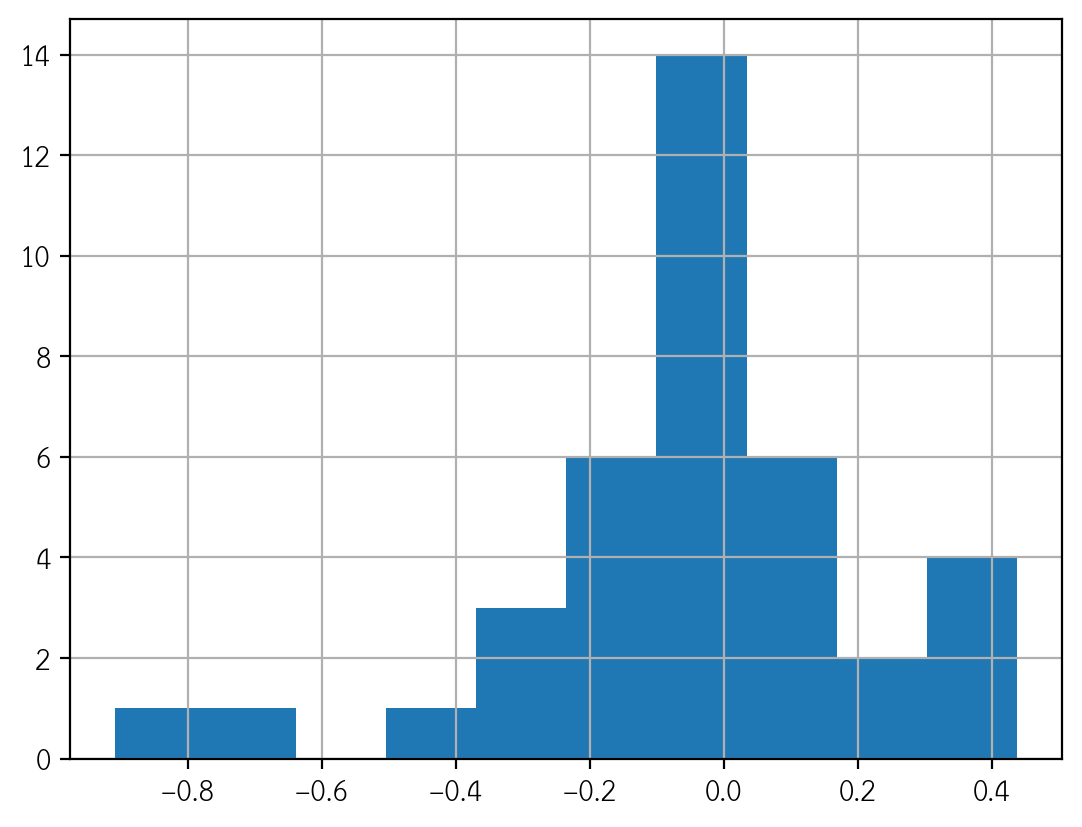

In [29]:
results['error'].hist()